In [1]:
# source: https://debuggercafe.com/train-ssd300-vgg16/
from roboflow import Roboflow
from eduset.ssd.ssd import Model, VOCDataLoader, VOCDetection
from eduset.ssd.ssd import get_train_transform, get_valid_transform
from torch.optim import AdamW
from torch.optim.lr_scheduler import StepLR

import json

In [2]:
# source: https://universe.roboflow.com/jan-zmrzly/eduset-one-dataset/dataset/1

rf = Roboflow(api_key="fcoVgrABNNRobZYGuyhZ")
project = rf.workspace("jan-zmrzly").project("eduset-one-dataset")
dataset = project.version(1).download("voc")


loading Roboflow workspace...
loading Roboflow project...


In [3]:
with open('../eduset/ssd/config.json', 'r') as file:
    data = json.load(file)

batch_size = data["config"]["BATCH_SIZE"]
resize_to = data["config"]["RESIZE_TO"]
num_epochs = data["config"]["NUM_EPOCHS"]
num_workers = data["config"]["NUM_WORKERS"]

train_dictionary = data["config"]["TRAIN_DIR"] 
val_dictionary = data["config"]["VAL_DIR"] 

classes = data["config"]["CLASSES"]
num_classes = data["config"]["NUM_CLASSES"]

out_dictionary = data["config"]["OUT_DIR"]

In [4]:
train_dataset = VOCDetection(root=train_dictionary,
                             classes=classes,
                             width=resize_to,
                             height=resize_to,
                             transforms=get_train_transform(),
                             name="Train")

val_dataset = VOCDetection(root=val_dictionary,
                           classes=classes, 
                           width=resize_to,
                           height=resize_to,
                           transforms=get_valid_transform(),
                           name="Validation")

classes_vis = {0: {"name": "circle", "color": (255, 0, 0)},
           1: {"name": "square", "color": (0, 255, 0)}, 
           2: {"name": "triangle", "color": (0, 0, 255)}}

print(train_dataset)
print(val_dataset)

Name:		Train
Classes:	['__background__', 'square', 'circle', 'triangle']
Items:		143

Name:		Validation
Classes:	['__background__', 'square', 'circle', 'triangle']
Items:		29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


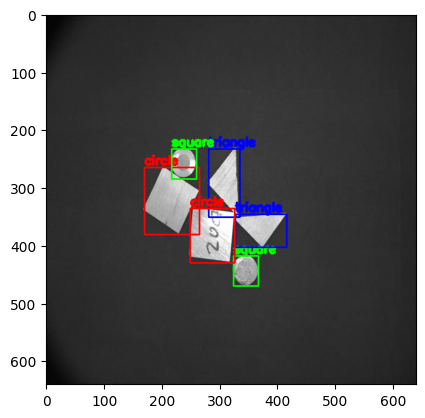

In [5]:
train_dataset.vizualize(100, classes_vis)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


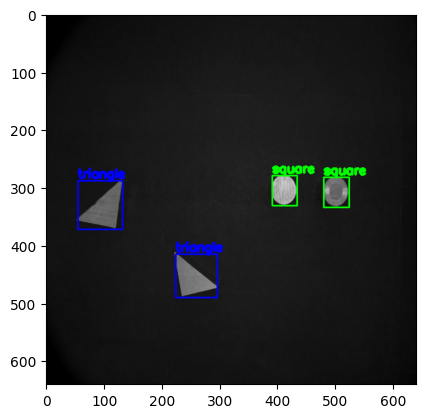

In [6]:
val_dataset.vizualize(10, classes_vis)

In [7]:
train_dataloader = VOCDataLoader(train_dataset, shuffle=True)
val_dataloader = VOCDataLoader(val_dataset)

model = Model(train_dataloader=train_dataloader,
              val_dataloader=val_dataloader,
              epochs=4,
              out_dir=out_dictionary)
model.create(num_classes=num_classes, size=resize_to)
model.switch_gpu()

Model switched to cuda


In [8]:
optimizer = AdamW(params=model.params, 
                lr=0.0001)

scheduler = StepLR(optimizer=optimizer, 
                   step_size=15, 
                   gamma=0.01)

model.set_optimizer(optimizer)
model.set_scheduler(scheduler)

In [9]:
model.train()

  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating


Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.


Epoch #1 train loss: 7.827
Epoch #1 mAP: 0.21396398544311523
Epoch #1	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #2 train loss: 5.472
Epoch #2 mAP: 0.39526161551475525
Epoch #2	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #3 train loss: 4.731
Epoch #3 mAP: 0.7465133666992188
Epoch #3	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #4 train loss: 4.160
Epoch #4 mAP: 0.834761917591095
Epoch #4	Model was saved


<Figure size 640x480 with 0 Axes>